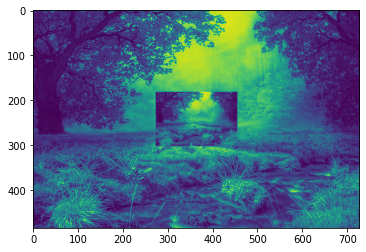

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('forest.jpg')
grayscale = img.convert('L')

copy_gs = grayscale.copy()

resized_gs = copy_gs.resize((copy_gs.width//4, copy_gs.height//4))

rotated_gs = resized_gs.rotate(270)

copy_gs.paste(resized_gs, ((copy_gs.width//2-resized_gs.width//2),(copy_gs.height//2-resized_gs.height//2)))

plt.imshow(copy_gs)

In [ ]:
rgb = img.convert('RGB')

copy_rgb = rgb.copy()

resized_rgb = copy_rgb.resize((copy_rgb.width//4, copy_rgb.height//4))

rotated_rgb = resized_rgb.rotate(270)

copy_rgb.paste(resized_rgb, ((copy_rgb.width//2-resized_rgb.width//2),(copy_rgb.height//2-resized_rgb.height//2)))

plt.imshow(copy_rgb)

In [ ]:
import math
img_lake = Image.open('lake.jpg')
img_lake_copy = img_lake.copy()
shift_val = 0.5

def horiz_shifting(img, shift):
    if img.mode == 'L' or img.mode == 'RGB':
        if shift>=0 and shift<=1:
            # shifting value of the image to the right 
            shift_right_val = math.ceil(img.width*shift)
            # the value of ignored part of shifted image to be filled from the left
            fill_left_val = math.floor(img.width-img.width*shift)
            # cropping ignored part of shifted image
            cropped_img = img.crop((fill_left_val,0,img.width,img.height))
            # shifting image to the right
            img.paste(img, (shift_right_val,0))
            # filling image from the left with ignored part of shifted image
            img.paste(cropped_img, (0,0))
            plt.imshow(img)
        else:
            print('shift should not be less than zero and more than 1!')
    else:
        print('Image mode should be grayscale or RGB!')
        

#horiz_shifting(img_lake_copy, shift_val)

In [ ]:
def vert_shifting(img, shift):
    if img.mode == 'L' or img.mode == 'RGB':
        if shift>=0 and shift<=1:
            # shifting value of the image to the bottom 
            shift_bottom_val = math.ceil(img.height*shift)
            # resized_image is used just for pasting onto img, it didnt change the size
            # if img pasted onto img in vertical positioning it turns into bunch of multiple repeating images
            resized_image = img.resize((img.width, img.height))
            # the value of ignored part of shifted image to be filled from the top
            fill_top_val = math.floor(img.height-img.height*shift)
            # cropping ignored part of shifted image
            cropped_img = img.crop((0,fill_top_val,img.width,img.height))
            # shifting image to the bottom
            img.paste(resized_image, (0, shift_bottom_val))
            # filling image from the top with ignored part of shifted image
            img.paste(cropped_img, (0,0))
            plt.imshow(img)
        else:
            print('shift should not be less than zero and more than 1')
    else:
        print('Image mode should be grayscale or RGB!')
        
vert_shifting(img_lake_copy, shift_val)